In [2]:
#plot age vs nationality graph.
import pandas as pd

artist_df = pd.read_csv("artists.csv")

print(artist_df.shape)

#removing nan values from dataframe
artist_data = artist_df.dropna()

#make another column with header age = death year - birth year
artist_data['Age'] = artist_data['Death Year'] - artist_data['Birth Year']
#artist_data['Age'] = artist_data.apply(lambda row: artist_data['Death Year'] - artist_data['Birth Year'], axis=1)

print(artist_data.head())
artist_data.shape


artist_nation_age = artist_data[['Nationality','Age']] #artist_nation_age contains nation and age(duplicate)
artist_nation_age.shape

(15091, 6)
    Artist ID                 Name Nationality Gender  Birth Year  Death Year  \
0           1       Robert Arneson    American   Male      1930.0      1992.0   
9          11      Jean (Hans) Arp      French   Male      1886.0      1966.0   
11         13  J. Arrelano Fischer     Mexican   Male      1911.0      1995.0   
12         15        Folke Arstrom     Swedish   Male      1907.0      1997.0   
13         16    Cristobal Arteche     Spanish   Male      1900.0      1964.0   

     Age  
0   62.0  
9   80.0  
11  84.0  
12  90.0  
13  64.0  


<ipython-input-2-ce76f2c2246b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_data['Age'] = artist_data['Death Year'] - artist_data['Birth Year']


(4429, 2)

In [28]:
#listing unique values in Nationality and counting them
unique_nation = artist_nation_age.Nationality.unique()


nation_mean_age = pd.DataFrame(unique_nation,columns = ['Nation'])

age_list = []
for nation in unique_nation:
    select_nation = artist_nation_age.loc[artist_nation_age['Nationality']==nation]
    age_list.append(select_nation['Age'].mean())

nation_mean_age['Age'] = age_list
nation_mean_age = nation_mean_age.sort_values(by=['Age'], ascending=False)

print(nation_mean_age.head(20))
nation_mean_age.shape
    

             Nation    Age
71  Czechoslovakian  92.00
40         Algerian  86.00
48       Paraguayan  86.00
52       Nicaraguan  84.00
70         Nigerian  83.50
36         Peruvian  79.75
49        Norwegian  79.00
58        Slovenian  79.00
59         Scottish  79.00
64           Malian  79.00
37         Yugoslav  78.40
17           Danish  78.00
55        Bulgarian  78.00
20          Israeli  77.00
3           Swedish  76.50
8         Colombian  76.00
12        Argentine  75.72
28          Haitian  75.25
51            Greek  75.00
56         Croatian  75.00


(72, 2)

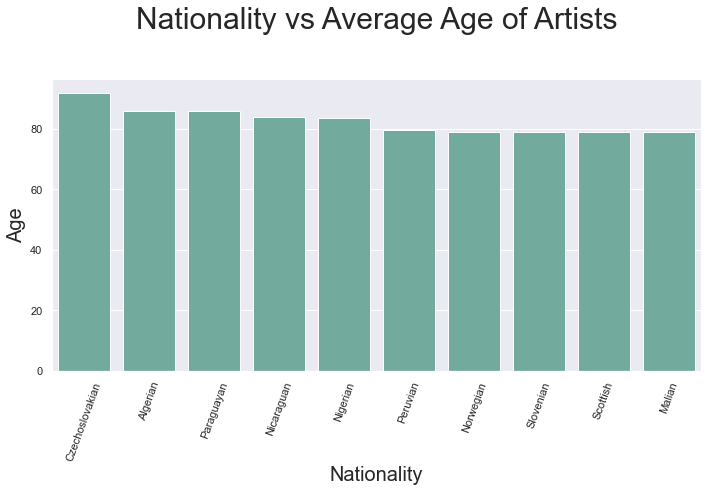

In [43]:
#plot nationality vs age
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
a = sns.barplot(
    x=nation_mean_age['Nation'][:10], 
    y=nation_mean_age['Age'][:10], 
    data=nation_mean_age, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');
a.set_xlabel("Nationality",fontsize=20)
a.set_ylabel("Age",fontsize=20)
a.set_title('Nationality vs Average Age of Artists',fontsize=30, pad=50)

plt.xticks(rotation=70)
plt.tight_layout()